In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

C:\Users\HOME\anaconda3\envs\AIML\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\HOME\anaconda3\envs\AIML\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\HOME\anaconda3\envs\AIML\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\HOME\anaconda3\envs\AIML\lib\site-packages\tensorflow\python\framework

In [6]:
model = load_model("model1_2classes_7Jan2022.h5")

#model2 = load_model("model_77classes_20Jan2022.h5")
#model2 = load_model("model1_80classes_07Jan2022.h5")
model2 = load_model("model_78classes_2Feb2022.h5")



In [11]:
model = load_model("model_2classes_2Feb2022.h5")
model2 = load_model("model_78classes_2Feb2022.h5")


In [12]:
from PIL import Image, ImageOps
IMG_SIZE = 28
name_of_char = ['single 1','connect 2']

def add_border(input_image, color):
    img = input_image
    x,y,_ = img.shape
    #print(x,y)
    if x>y :
        border_x = int(x/15)
        border_y = int(((x+2*border_x)-y)/2)
    elif y>x :
        border_y = int(y/15)
        border_x = int(((y+2*border_y)-x)/2)
    else:
        border_x = int(x/15)
        border_y = int(y/15)
    
    #print(x,y,border_x,border_y)
    img = Image.fromarray(img)
    border = (border_y, border_x, border_y, border_x)

    if isinstance(border, int) or isinstance(border, tuple):
        bimg = ImageOps.expand(img, border=border, fill=color)
        bimg = bimg.resize((IMG_SIZE, IMG_SIZE))
    else:
        raise runtimeerror('border is not an integer or tuple!')
    return(bimg)


In [13]:
#222222222222222
from PIL import Image, ImageOps
IMG_SIZE = 28
#name_of_char = ['single 1','connect 2']

def add_border(input_image, color):
    img = input_image
    y,x = img.size
    #print(x,y)
    if x>y :
        border_x = int(x/15)
        border_y = int(((x+2*border_x)-y)/2)
    elif y>x :
        border_y = int(y/15)
        border_x = int(((y+2*border_y)-x)/2)
    else:
        border_x = int(x/15)
        border_y = int(y/15)
    
    #print(x,y,border_x,border_y)
    #img = Image.fromarray(img)
    border = (border_y, border_x, border_y, border_x)

    if isinstance(border, int) or isinstance(border, tuple):
        bimg = ImageOps.expand(img, border=border, fill=color)
        bimg = bimg.resize((IMG_SIZE, IMG_SIZE))
    else:
        raise runtimeerror('border is not an integer or tuple!')
    return(bimg)


In [20]:
name_of_char = ['ก','ข','ฃ','ค','ต','ฆ','ง','จ',
                'ฉ','ช','ซ','ฌ','ญ','ฎ','ฏ','ฐ',
                'ฑ','ฒ','ณ','ด','ต','ถ','ท','ธ',
                'น','บ','ป','ผ','ฝ','พ','ฟ','ภ',
                'ม','ย','ร','ล','ว','ศ','ษ','ส',
                'ห','ฬ','อ','ฮ','ั','็','า',
                'ิ','ี','ึ','ื','ุ', 'ู','เ','แ',
                'ใ','ไ','โ','ฤ','ฦ','่','้',
                '๊','๋','์','ๆ','ฯ','๐','๑',
                '๒','๓','๔','๕','๖','๗','๘','๙','ฐ2']  #77

#model2 = load_model("model_77classes_20Jan2022.h5")

In [37]:
name_of_char = ['ก','ข','ฃ','ค','ต','ฆ','ง','จ',
                'ฉ','ช','ซ','ฌ','ญ','ฎ','ฏ','ฐ',
                'ฑ','ฒ','ณ','ด','ต','ถ','ท','ธ',
                'น','บ','ป','ผ','ฝ','พ','ฟ','ภ',
                'ม','ย','ร','ล','ว','ศ','ษ','ส',
                'ห','ฬ','อ','ฮ','ั','ั','อ็','า',
                'อิ','อี','อึ','อื','ุ','ู','เ','แ',
                'ใ','ไ','โ','ฤ','ฦ','ๅ','อ่','้',
                'อ๊','อ๋','อ์','ๆ','ฯ','ำ','๐','๑',
                '๒','๓','๔','๕','๖','๗','๘','๙']

#model2 = load_model("model1_80classes_07Jan2022.h5")

In [15]:


allAns =[]
def pred(x,y,w,h,img_in):
    cropped_image = img_in.crop((x,y,x+w,y+h))
    
    #cropped_image = cropped_image.resize((IMG_SIZE, IMG_SIZE))
    
    cropped_image = add_border(cropped_image, color="white") 
    
    #plt.imshow(cropped_image)
    #plt.show()
        
    #X = image.img_to_array(img)
    img = cropped_image
    X = image.img_to_array(img)
    #X = np.array(img)
    X = np.expand_dims(X/255,axis = 0)
    images = np.vstack([X])
    
    val = np.argmax(model2.predict(images))
    ans1 = name_of_char[val]
    #ans1 = str(val)
    #print(ans1)
    return(ans1)
    
    #ans = str(val)
    

        
def sliding_window (x, y, w, h, img_in):
    connect1_1 = [[],[]]
    for i in range(3,17):
        w1 = int(w*(15+i)/45)
        wN1 = int(w*(2/3))
        wN2 = int(w*(1/3))
        x1, y1, w1, h1 = x, y, w1, h 
        x2, y2, w2, h2 = x+w1, y,w-w1 ,h

        connect1_1[0].append(pred(x1, y1, w1, h1, img_in))
        sec_position = pred(x2, y2, w2, h2, img_in)
        if sec_position=='ๅ':
            connect1_1[1].append('า')
        else:
            connect1_1[1].append(sec_position)
        #connect1_1[1].append(pred(x2, y2, w2, h2, img_in))
        cv2.rectangle(image1,(x1,y1), (x1+w1,y1+h1), (10,15,15), 1)
    #print(np.array(connect1_1))

    Ans = ""
    for j in range(len(connect1_1)):
        finalAns = [""]
        num = 0
        for i in range(len(connect1_1[j])):
            x = connect1_1[j].count(connect1_1[j][i])
            if x == num and connect1_1[j][i] != finalAns[0] :   
                finalAns.insert(0,connect1_1[j][i])
            elif x>num:
                finalAns = [connect1_1[j][i]]
                num=x
        Ans = Ans+ finalAns[0] + " "

        #print('\n Position', j+1, ":", finalAns)
    return(Ans)

107925
[143, 444, 836]


C:\Users\HOME\anaconda3\envs\AIML\lib\site-packages\ipykernel_launcher.py:161: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


[list(['ก า ', 'ร', 'ต', 'ร', 'ว', 'จ', 'จ', 'ั', 'บ', 'ล า ', 'ย', 'ม', 'ื', 'อ', 'เ', 'ข', 'ี', 'ย', 'น'])
 list(['เ', 'เ', 'ป', 'ล', 'ง', 'ค ว ', 'า', 'ม', 'ห ม ', 'า', 'ย', 'ท ด ', 'ส ภ ', 'บ', 'ก', 'า', 'ร', 'ท', '๐', 'า', 'ง', 'า', 'น'])
 list(['พ', 'ิ', 'เ', 'ศ', 'ษ', 'บ', 'า', 'ง', 'ฟ', 'ั', 'ง', 'ก', '์', 'ฮ', 'ั', 'น', 'ก', 'า', 'ร', 'ร', 'ม', 'ฐ2', 'ฐ', 'ญ', 'ั', 'ฤ', 'า', 'ภ', 'า'])]
การตรวจจับลายมือเขียน
แปลงความหมายทดสภบการทำงาน
พิเศษบางฟังก์ฮันการรมฐญฤๅภา



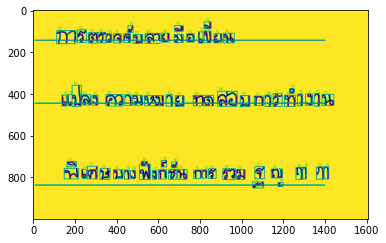

In [93]:
path = "Pictures/tw36.jpg"   
image1 = cv2.imread(path)  #4
img_in = image.load_img(path , color_mode='grayscale')

scale_percent = 100 # percent of original size
width = int(image1.shape[1] * scale_percent / 100)
height = int(image1.shape[0] * scale_percent / 100)
dim = (width, height)
  
image1 = cv2.resize(image1, dim, interpolation = cv2.INTER_AREA)

# Convert the image to grayscale
gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY) 
ret, binary = cv2.threshold(gray, 100, 255, cv2.THRESH_OTSU)
inverted_binary = ~binary

_,contours, hierarch = cv2.findContours(inverted_binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
with_contours = cv2.drawContours(binary, contours, 0, (0, 255, 0), -1)


font = cv2.FONT_HERSHEY_SIMPLEX

# delete contours
deleteCnt = []
for a in contours:
    x1, y1, w1, h1 = cv2.boundingRect(a)
    deleteCnt.append([x1, y1, w1, h1])
    for b in contours:
        x2, y2, w2, h2 = cv2.boundingRect(b)
        if x2<x1 and y2<y1 and w2+x2 > w1+x1 and h2+y2 > h1+y1 :
            deleteCnt.remove([x1, y1, w1, h1])
            break


# Draw a bounding box around all contours
img_cr = []

count_cor = 0
count_all = 0
collecx = []
collecy = []
final_position = []

for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    
    if [x, y, w, h] not in deleteCnt:
        continue
    final_position.append([x, y, w, h])
    collecx.append(x)
    collecy.append(y)

    
def pedict(c):
    x, y, w, h = c[0],c[1],c[2],c[3]
    
    
    #if [x, y, w, h] not in deleteCnt:
    #    continue
    img_in = image.load_img(path , color_mode='grayscale')
    
    cropped_image = img_in.crop((x,y,x+w,y+h))
    
    #cropped_image = add_border(cropped_image, color="white")  ##############################
    img_cr.append(cropped_image) ####
    
    
    cropped_image = cropped_image.resize((IMG_SIZE, IMG_SIZE))   ##############################
    
    #.imshow(cropped_image)
    #plt.show()
    
    img = cropped_image
    X = image.img_to_array(img)
    #X = np.array(img)
    X = np.expand_dims(X/255,axis = 0)
    images = np.vstack([X])
    
    val = np.argmax(model.predict(images))
    #ans1 = list(train_dataset.class_indices.keys())[val]
    ans1 = ['1C','2C'][val]
    
    if model.predict(images)[0][1] > 0.09 :
        ans1 = '2C'
    
    if ans1 == '1C':
        ans = pred(x,y,w,h,img_in)
        #print(ans)
    else:
        ans = sliding_window(x, y, w, h, img_in)
    
    #print(ans1,val,  model.predict(images))
    
  
    
    cv2.rectangle(with_contours,(x,y), (x+w,y+h), (100,255,250), 2)
    cv2.putText(with_contours, ans1,(x+6,y-6), font, 0.5,(100,255,250), 1)
    
    return(ans)
    

X1 = []
line = []
check_point = 0
total = img_in.size[0]*255
hig = img_in.size[0]*0.135
for i in range(height):
    
    sumRow = sum(np.array(img_in)[i])
    count = total-sumRow
    X1.append(count)
    
    if count >= 1200 and check_point == 0:
        #line.append(i)
        check_point = 1

    if count < 30 and check_point == 1:
        line.append(i-20)
        cv2.rectangle(with_contours,(10,i-20), (1400,i-18), (100,255,250), 2)
        check_point = 0
        
print(max(X1))     
print(line)



collecy.sort()
collecx.sort()
#L = [160 , 320, 450]
#L = [240 , 480, 680] 27
#L = [300 , 600,900]  #28
collec_all = []
for l in line:
    collec_line = []
    #print(np.array(final_position))
    #print(collecx ,"\n",collecy)
    for i in collecx:
        for p in final_position:

            if p[0]==i and abs((p[1]+p[3])-l)<60:
                #print(p)
                w = pedict(p)
                collec_line.append(w)
                
                final_position.remove(p)

                lb = p[0]
                ub = p[0]+p[2]
                dele = []
                for po in final_position:
                    if po[0] >=lb-2 and po[0] <=ub+2 and abs(po[1]+po[3]-l)<hig :
                        w = pedict(po)
                        collec_line.append(w)
                        dele.append(po)
                for de in dele:
                    final_position.remove(de)
                        
    collec_all.append(collec_line)
            
            
print(np.array(collec_all))
message = ""
scrip = 0
for l in collec_all:
    line = ""
    for i in range(len(l)):
        if scrip == 1 :
            scrip = 0
            continue
        c = l[i]
        
        if len(c)==4 : #ตัวติดกันมีสระบน
            c1 = l[i].split()
            try:
                if l[i+2]!= "ั" and (l[i+1] == '่' or l[i+1] == '้' or l[i+1] == '๊' or l[i+1] == '๋' or l[i+1] == 'ั' or l[i+1] == 'ี' or l[i+1] == 'ิ' or l[i+1] == 'ึ'):
                    c = c1[0]+ "้" + c1[1]
                    scrip = 1
                else:
                    c = c1[0]+c1[1]
                    
            except:
                c = c1[0]+c1[1]
    
            
        if c == "ั": # สระ อะ
            try:
                if l[i+1] == "ั":
                    c = "ะ"
                    scrip = 1
                else:
                    errorrrr = 1
            except:
                errorrrr = 1
                
        if c == "ฐ" or c == "ฐ2": #ฐ
            try:
                if l[i+1] == "ฐ" or l[i+1] == "ฐ2":
                    c = "ฐ"
                    scrip = 1
            except:
                errorrrr = 1
                
        if c == "ญ" or c == "ั": #ญ
            try:
                if l[i+1] == "ญ" or l[i+1] == "ั":
                    c = "ญ"
                    scrip = 1
            except:
                errorrrr = 1
                
        if c == "ฤ" or c == "ฦ": # ฤๅ ฦๅ
            try:
                if l[i+1] == "า" :
                    c = c + "ๅ"
                    scrip = 1
            except:
                errorrrr = 1
                
        if c == "๐" or c == "า": # อำ
            try:
                if l[i+1] == "า" or l[i+1] == "๐":
                    c = "ำ"
                    scrip = 1
            except:
                errorrrr = 1
                
        if c == "เ": #แอ
            try:
                if l[i+1] == "เ":
                    c = "แ"
                    scrip = 1
            except:
                errorrrr = 1
        
        line += c
    
    
    message += line + "\n"
    
print(message)
    
    
    

        

plt.imshow(with_contours)
plt.show()


#with_contours = cv2.resize(with_contours , (1300,800), interpolation = cv2.INTER_AREA)
cv2.imshow('All contours with bounding box', with_contours)
cv2.waitKey(0)
cv2.destroyAllWindows()


[356, 394, 441, 465, 488, 492, 521, 528, 584, 591, 591, 625, 666, 683, 720, 751, 752] 
 [211, 234, 242, 245, 250, 480, 480, 486, 541, 542, 765, 804, 809, 810, 813, 815, 904]


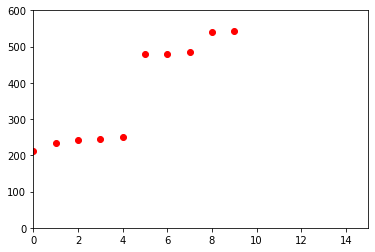

In [11]:
collecy.sort()
collecx.sort()

print(collecx ,"\n",collecy)
plt.plot([c for c in range(17)], collecy, 'ro')
plt.axis([0, 15, 0, 600])
plt.show()

In [135]:
final_position1 = final_position

In [159]:
collecy.sort()
collecx.sort()
L = [160 , 320, 450]
collec_all = []
for l in L:
    collec_line = []
    #print(np.array(final_position))
    #print(collecx ,"\n",collecy)
    for i in collecx:
        for p in final_position:

            if p[0]==i and abs(p[1]-l)<30:
                #print(p)
                collec_line.append('ก')
                final_position.remove(p)

                lb = p[0]
                ub = p[0]+p[2]
                for po in final_position:
                    if po[0] >=lb and po[0] <=ub and abs(po[1]-l)<60 :
                        collec_line.append('ั')
                        final_position.remove(po)
                        
    collec_all.append(collec_line)
            
            
print(collec_word)

[158, 194, 219, 243, 278, 285, 312, 312, 325, 367, 381, 418, 484, 521] 
 [104, 132, 138, 139, 140, 305, 308, 310, 312, 319, 322, 450, 451, 465]
[158, 194, 219, 243, 278, 285, 312, 312, 325, 367, 381, 418, 484, 521] 
 [104, 132, 138, 139, 140, 305, 308, 310, 312, 319, 322, 450, 451, 465]
[158, 194, 219, 243, 278, 285, 312, 312, 325, 367, 381, 418, 484, 521] 
 [104, 132, 138, 139, 140, 305, 308, 310, 312, 319, 322, 450, 451, 465]
[]


In [165]:
print(collec_all)
message = ""
for l in collec_all:
    line = ""
    for c in l:
        line += c
    
    message += line + "\n"
    
print(message)

[['ก', 'ก', 'ก', 'ั', 'ก'], ['ก', 'ก', 'ก', 'ก', 'ก', 'ก'], ['ก', 'ก', 'ก']]
กกกัก
กกกกกก
กกก



In [146]:
path = "Pictures/tw26.jpg"   
image1 = cv2.imread(path)  #4

In [69]:
XX = "บ า"
XX.split()


['บ', 'า']

[356, 394, 441, 465, 488, 492, 521, 528, 584, 591, 591, 625, 666, 683, 720, 751, 752] 
 [211, 234, 242, 245, 250, 480, 480, 486, 541, 542, 765, 804, 809, 810, 813, 815, 904]


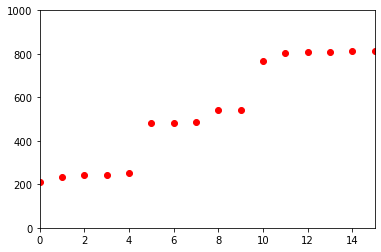

In [25]:

print(collecx ,"\n",collecy)
plt.plot([c for c in range(17)], collecy, 'ro')
plt.axis([0, 15, 0, 1000])
plt.show()

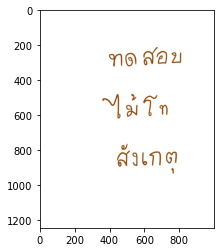

In [24]:
plt.imshow(image1)
plt.show()

In [79]:
z = [1,2,3,4,5,6]
for i in range(len(z)):
    try :
        print(z[i+1])
    except:
        1+1

2
3
4
5
6
